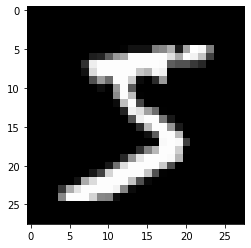

In [2]:
import numpy as np
import matplotlib.pyplot as plt

####### Step 1

# A function to plot images
def show_image(img):
    image = img.reshape((28, 28))
    plt.imshow(image, 'gray')


# Reading The Train Set
train_images_file = open('train-images.idx3-ubyte', 'rb')
train_images_file.seek(4)
num_of_train_images = int.from_bytes(train_images_file.read(4), 'big')
train_images_file.seek(16)

train_labels_file = open('train-labels.idx1-ubyte', 'rb')
train_labels_file.seek(8)

train_set = []
for n in range(num_of_train_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i, 0] = int.from_bytes(train_images_file.read(1), 'big') / 256
    
    label_value = int.from_bytes(train_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1
    
    train_set.append((image, label))


# Reading The Test Set
test_images_file = open('t10k-images.idx3-ubyte', 'rb')
test_images_file.seek(4)

test_labels_file = open('t10k-labels.idx1-ubyte', 'rb')
test_labels_file.seek(8)

num_of_test_images = int.from_bytes(test_images_file.read(4), 'big')
test_images_file.seek(16)

test_set = []
for n in range(num_of_test_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i] = int.from_bytes(test_images_file.read(1), 'big') / 256
    
    label_value = int.from_bytes(test_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1
    
    test_set.append((image, label))


# Plotting an image
show_image(train_set[0][0])
plt.show()

In [3]:
####### Step 2

# separate first 100 pics from train set

train_set_f100 = train_set[:100]

In [54]:

def sigmoid_activation(x):
	return 1.0 / (1 + np.exp(-x))

def predict(train_set, w, b): 
    w_layer_2 = w[0]
    b_2 = b[0]
    
    w_layer_3 = w[1]
    b_3 = b[1]
    
    w_layer_4 = w[2]
    b_4 = b[2]

    a_s = []
    # layer 2
    a_2 = np.zeros((16, 1))

    #for j in range(16):
        #a_2[j, 0] = sigmoid_activation(np.dot(w_layer_2[j].reshape(1,784), train_set[0])[0][0] + b_2[j])
    a_2 = sigmoid_activation(w_layer_2 @ train_set[0] + b_2)
    a_s.append(a_2)
    
    # layer 3
    a_3 = np.zeros((16, 1))

    #for j in range(16):
        #a_3[j, 0] = sigmoid_activation(np.dot(w_layer_3[j].reshape(1,16), a_2)[0][0] + b_3[j])
    a_3 = sigmoid_activation(w_layer_3 @ a_2 + b_3)
    a_s.append(a_3)

    # layer 4
    a_4 = np.zeros((10, 1))

    #for j in range(10):
        #a_4[j, 0] = sigmoid_activation(np.dot(w_layer_4[j].reshape(1,16), a_3)[0][0] + b_4[j])
    a_4 = sigmoid_activation(np.transpose(w_layer_4 @ a_3) + b_4)
    a_s.append(a_4)

    #for i in range(len(a_4)):
    #    a_4[i, 0] = sigmoid_activation(a_4[i, 0])
    return a_4, a_s

def cal_accuracy(train_set, w, b):

    correct = 0
    for i in range(100):
        pre, _ = predict(train_set[i], w, b)

        # examine
        if np.argmax(pre) == np.argmax(train_set[i][1]):
            correct += 1

    accuracy = correct/100
    return accuracy

b = [np.zeros(16), np.zeros(16), np.zeros(10)] 
w = [np.random.rand(16,784), np.random.rand(16,16), np.random.rand(10,16)]

acc = cal_accuracy(train_set_f100, w, b)
acc

0.08

In [9]:
####### Step 3

def next_batch(dataset, batchSize):
    for i in range(0, len(dataset), int(len(dataset)/batchSize)):
        yield dataset[i:i + int(len(dataset)/batchSize)]

cost_av = np.zeros(40)
learning_rate = 1
number_of_epochs = 40
batch_size = 10 
loss = None

b = [np.zeros(16), np.zeros(16), np.zeros(10)] 
#w = [np.random.rand(16,784), np.random.rand(16,16), np.random.rand(10,16)]

w = [np.random.randn(16, 784), np.random.randn(16, 16), np.random.randn(10, 16)]

for i in range(number_of_epochs):
    cost = 0
    for batch in list(next_batch(train_set_f100, batch_size)):

        grad_b = [np.zeros(16), np.zeros(16), np.zeros(10)] 
        grad_w = [np.zeros((16,784)), np.zeros((16,16)), np.zeros((10,16))]
        #grad_a = [np.zeros(16), np.zeros(16), np.zeros(10)]
        for image in batch:
            ans, a_s = predict(image, w, b)
            a_2 = a_s[0]
            a_3 = a_s[1]
            a_4 = a_s[2]

            # ws of layer 4
            dcost_dw_4 = np.random.rand(10,16)
            dcost_db_4 = np.zeros(10)
            dcost_a_3 = np.zeros(16)
            for j in range(10):
                z = np.dot(w[2][j].reshape(1,16), a_3)[0][0]
                for k in range(16):
                    correct_ans_index = np.argmax(ans)
                    dcost_dw_4[j, k] = 2*(ans[j] - image[1][j])*sigmoid_activation(z)*(1-sigmoid_activation(z))*a_3[k][0]
                dcost_db_4[j] = 2*(ans[j] - image[1][j])*sigmoid_activation(z)*(1-sigmoid_activation(z))
                cost += (ans[j] - image[1][j])**2
            
            # as for layer 3
            for k in range(16):
                for j in range(10):
                    z = np.dot(w[2][j].reshape(1,16), a_3)[0][0]
                    dcost_a_3[k] +=  2*(ans[j] - image[1][j])*sigmoid_activation(z)*(1-sigmoid_activation(z))*w[2][j, k]
                    #print(ans[j])
                    #print(image[1][j])
            
            # ws of layer 3
            dcost_dw_3 = np.random.rand(16,16)
            dcost_db_3 = np.zeros(16)
            dcost_a_2 = np.zeros(16)
            for j in range(16):
                z = np.dot(w[1][j].reshape(1,16), a_2)[0][0]
                for k in range(16):
                    dcost_dw_3[j, k] = dcost_a_3[j]*sigmoid_activation(z)*(1-sigmoid_activation(z))*a_2[k][0]
                dcost_db_3[j] = dcost_a_3[j]*sigmoid_activation(z)*(1-sigmoid_activation(z))
            
            # as for layer 2
            for k in range(16):
                for j in range(16):
                    z = np.dot(w[1][j].reshape(1,16), a_2)[0][0]
                    dcost_a_2[k] +=  dcost_a_3[k]*sigmoid_activation(z)*(1-sigmoid_activation(z))*w[1][j, k]
            
            # ws of layer 2
            dcost_dw_2 = np.random.rand(16,784)
            dcost_db_2 = np.zeros(16)
            for j in range(16):
                z = np.dot(w[0][j].reshape(1,784), image[0])[0][0]
                for k in range(784):
                    dcost_dw_2[j, k] = dcost_a_2[j]*sigmoid_activation(z)*(1-sigmoid_activation(z))*image[0][k]
                dcost_db_2[j] = dcost_a_2[j]*sigmoid_activation(z)*(1-sigmoid_activation(z))


            grad_w[2] = grad_w[2] + dcost_dw_4
            grad_w[1] = grad_w[1] + dcost_dw_3
            grad_w[0] = grad_w[0] + dcost_dw_2
            # grad_b += dcost/db
            grad_b[2] = grad_b[2] + dcost_db_4
            grad_b[1] = grad_b[1] + dcost_db_3
            grad_b[0] = grad_b[0] + dcost_db_2
        
        # W = W - (learning_rate × (grad_W / batch_size))
        w[2] = w[2] - (learning_rate*(grad_w[2]/batch_size))
        w[1] = w[1] - (learning_rate*(grad_w[1]/batch_size))
        w[0] = w[0] - (learning_rate*(grad_w[0]/batch_size))
        # b = b - (learning_rate × (grad_b / batch_size))
        b[2] = b[2] - (learning_rate*(grad_b[2]/batch_size))
        b[1] = b[1] - (learning_rate*(grad_b[1]/batch_size))
        b[0] = b[0] - (learning_rate*(grad_b[0]/batch_size))
    
    cost_av[i] = cost/10

acc = cal_accuracy(train_set_f100, w, b)
print(w)
print(b)
print(acc)

print(cost_av)
        



[array([[-0.35811863, -0.13322909,  0.8109293 , ..., -0.18633637,
         1.30831042, -0.57399925],
       [ 0.72651169,  0.05754614,  0.15589268, ..., -0.65960854,
        -1.35960589, -0.45112421],
       [ 2.25744068,  2.07037342, -0.45175798, ...,  3.16720503,
        -0.53532212,  0.56225055],
       ...,
       [ 0.41455865,  1.40539557, -0.79040035, ...,  0.10558398,
         0.8024695 , -0.71433699],
       [-0.4948315 ,  1.52573161, -0.00529446, ..., -2.31538014,
         1.55970171,  0.31552138],
       [-0.50023707, -2.14349076,  0.72277064, ...,  0.25757889,
        -0.10081457, -0.04568914]]), array([[-1.46008016e+00, -1.15022964e+00,  8.03842228e-02,
        -1.33065713e+00,  1.06146616e-01,  5.88806986e-02,
         9.61297569e-01,  7.02686588e-01,  1.13868358e+00,
        -2.17557264e+00,  5.56995363e-01,  5.93757337e-02,
         9.39278579e-01, -1.05703158e+00, -1.76904942e+00,
         1.53274965e+00],
       [ 1.05454361e+00, -1.20426728e-01,  1.16971780e+00,
     